In [107]:
import scripts.functionality as funcs
from scripts.graph import Graph
import pandas as pd
from collections import defaultdict

In [2]:
%load_ext autoreload
%autoreload 2

In [57]:
link_dict = funcs.read_graph()
link_dict = defaultdict(set, link_dict)

##### Read Data and save to json

In [4]:
pages_category = funcs.read_pages_category(filename='data/wiki-topcats-categories.txt')
funcs.write_json('data/page_category.json', pages_category)

In [5]:
name_page = funcs.read_name_page(filename='data/wiki-topcats-page-names.txt')
funcs.write_json('data/name_page.json', name_page)

##### Read data from json

In [6]:
# pages_category: Key is the category, and value is a list of integers which is associated to a set of articles
# name_page: Key is an integer that identifies the article. The value associated is the name of the article

pages_category = funcs.read_json('data/page_category.json')
name_page = funcs.read_json_int_key('data/name_page.json')

##### Understanding the data

- Edge_ID seems to be unique. This is the main reason for which we think it is the unique edge identifier
- From pages_category we have a set of category names (e.g. Members_of_the_Parliament_of_Great_Britain_for_Scottish_constituencies). These are the keys of the dictionary.
- The values in each of these keys are the pages contained in this category (e.g. '34683')
- The actual name of this page can be found in the dictionary name_page (the result seems to be a page somewhat related to that specific category)

In [7]:
# Find articles assigned to multiple categories
article_category = funcs.revert_dict_list(pages_category)

In [8]:
# Randomly pick one category for each article
unique_category = funcs.uniformly_pick_article_category(article_category)

In [9]:
# Revert back from articles to categories
final_pages_category = funcs.revert_dict(unique_category)
funcs.write_json('data/final_pages_category.json', final_pages_category)

##### Initialize Graph  Class

In [108]:
graph = Graph()

## Question2 ~ Pages reached in given number of clicks

In [109]:
small_graph = Graph()
complete_graph = Graph()

In [110]:
for index, row in link_df.head(50).iterrows():
    small_graph.add_edge(row[0], row[1])

In [111]:
for index, row in link_df.iterrows():
    complete_graph.add_edge(row[0], row[1])

In [116]:
pages_seen = complete_graph.pages_in_click(95, 5)

## Question4 ~ Induced Subgraph

In [125]:
import random
random_categories = random.sample(list(final_pages_category.keys()), k=2)

In [128]:
random_articles = final_pages_category[random_categories[0]] + final_pages_category[random_categories[1]]

In [129]:
random_articles

[71826,
 133157,
 202197,
 202306,
 202741,
 202747,
 203394,
 203539,
 203552,
 203554,
 203555,
 203556,
 203557,
 203558,
 203570,
 203572,
 203574,
 203575,
 203600,
 203602,
 203660,
 203731,
 203734,
 203739,
 203740,
 203741,
 203742,
 203749,
 203780,
 203781,
 203786,
 203788,
 203797,
 203807,
 203833,
 203839,
 203840,
 203882,
 203887,
 203906,
 204558,
 469723,
 560976,
 620823,
 624272,
 624354,
 624355,
 680142,
 680144,
 689850,
 706912,
 706913,
 706915,
 706916,
 709731,
 749491,
 749492,
 1010154,
 1150358,
 1317062,
 1485461,
 1517879,
 1531286,
 1550651,
 1550970,
 1570980,
 1244209,
 59908,
 56825,
 56843,
 1144654,
 56742,
 56879,
 56890,
 56965,
 70974,
 897640,
 1243342,
 41861,
 53938,
 54041,
 54042,
 54317,
 54362,
 54363,
 55661,
 56746,
 56785,
 56803,
 56834,
 56835,
 56838,
 56839,
 56840,
 56846,
 56848,
 56882,
 56912,
 56940,
 56956,
 56967,
 56984,
 56989,
 56990,
 57076,
 57080,
 57096,
 57101,
 57102,
 57104,
 57109,
 57111,
 57117,
 57118,
 57127,

In [130]:
small_graph.edges

defaultdict(set,
            {95: {1185516},
             108: {1059989, 1062426, 1161925},
             134: {541222, 1061485, 1163610, 1163783},
             153: {744272,
              1064807,
              1065282,
              1085943,
              1125916,
              1130618,
              1161083,
              1162104,
              1162238},
             167: {645690, 804311},
             173: {174,
              146870,
              1059766,
              1059906,
              1060905,
              1061638,
              1067692,
              1130481,
              1163227,
              1166373,
              1223897},
             174: {1061112, 1061313, 1063717, 1065339},
             980: {1067601},
             1086: {655218, 1063591, 1773335},
             1087: {1088,
              82897,
              301688,
              743828,
              1028633,
              1057862,
              1062055,
              1063918,
              1161725,
             

In [143]:
article =  set([173, 174, 1087, 95, 1088])

In [132]:
total_graph = small_graph.edges

In [149]:
induced_subgraph = {}
for vertice in article:
    induced_subgraph[vertice] = article.intersection(total_graph[vertice])

In [150]:
induced_subgraph

{1088: {1087}, 173: {174}, 174: set(), 1087: {1088}, 95: set()}

In [142]:
total_graph[174] in article

[False]

In [148]:
article.intersection(total_graph[173])

{174}

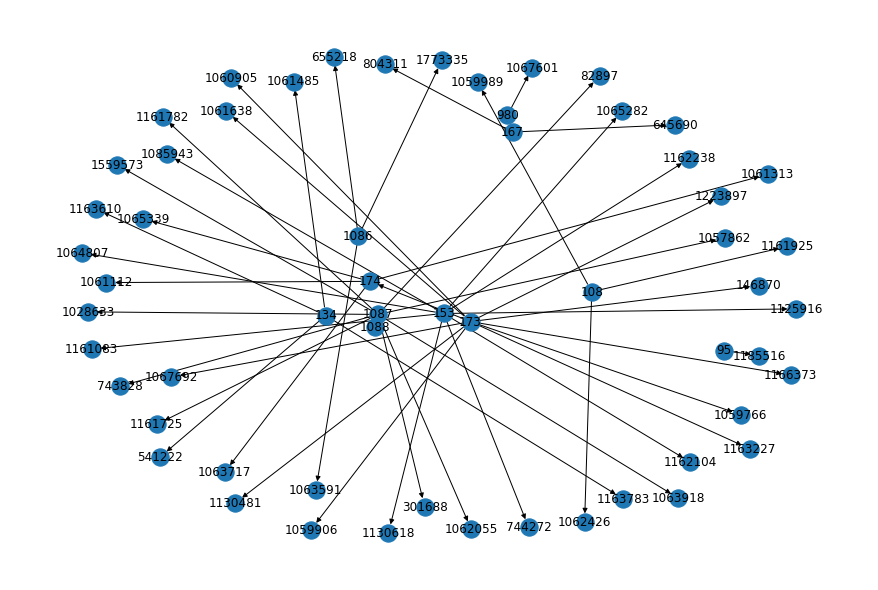

In [153]:
small_graph.plot_graph(small_graph.edges, with_labels=True)

In [154]:
name_page[1086]

'Jill Wagner'

In [155]:
name_page[655218]

'Vanessa Minnillo'

In [156]:
article

{95, 173, 174, 1087, 1088}

In [157]:
induced_subgraph = small_graph.generate_induced_subgraph(article)

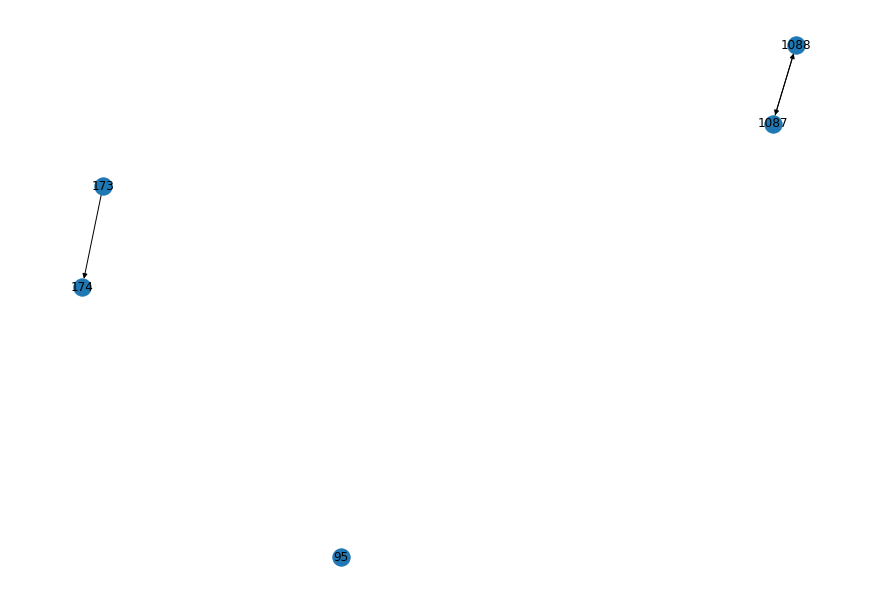

In [158]:
small_graph.plot_graph(induced_subgraph, with_labels=True)